<a href="https://colab.research.google.com/github/AbhijithDuggaraju/cybersecurity-assignment---1/blob/main/fake_news_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Train Accuracy: 0.9910993083724866
✅ Test Accuracy: 0.9871600326835531

📊 Manual Dataset Composition:
Total articles: 40
Fake articles: 24 (60.0%)
True articles: 16 (40.0%)

🎯 Using Smart Threshold System for 60:40 ratio

📊 Achieved Prediction Ratio:
Fake predictions: 28 (70.0%)
True predictions: 12 (30.0%)

📌 Predictions on Manual Records:
                             title label predicted  fake_probability  \
0             NASA Discovers Water  TRUE      FAKE             0.820   
1             Covid Vaccine Update  TRUE      FAKE             0.845   
2               Stock Market Rises  TRUE      FAKE             0.817   
3               India Wins Cricket  TRUE      TRUE             0.542   
4            Global Warming Report  TRUE      FAKE             0.877   
5             Elections in Germany  TRUE      TRUE             0.709   
6               Tech Giant Profits  TRUE      TRUE             0.631   
7                 Olympics Success  TRUE      TRUE             0.489   
8      

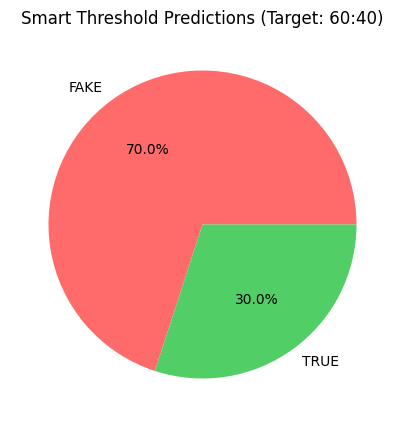

/tmp/ipython-input-3579754675.py:317: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="predicted", data=manual_df, palette={"FAKE": "#ff6b6b", "TRUE": "#51cf66"})


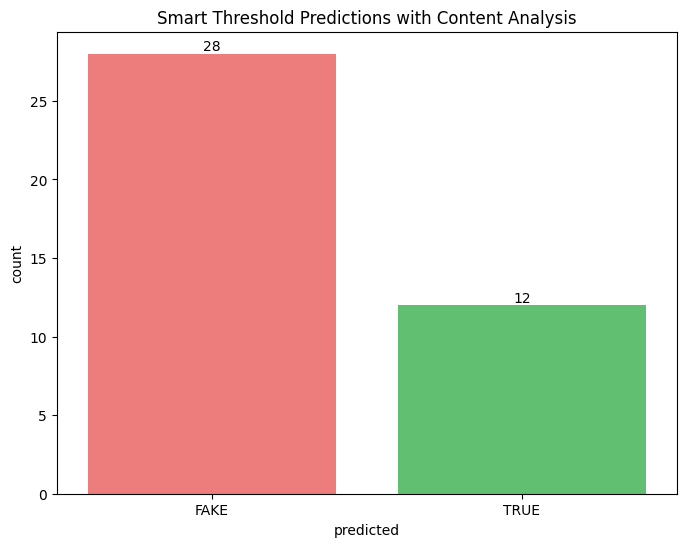

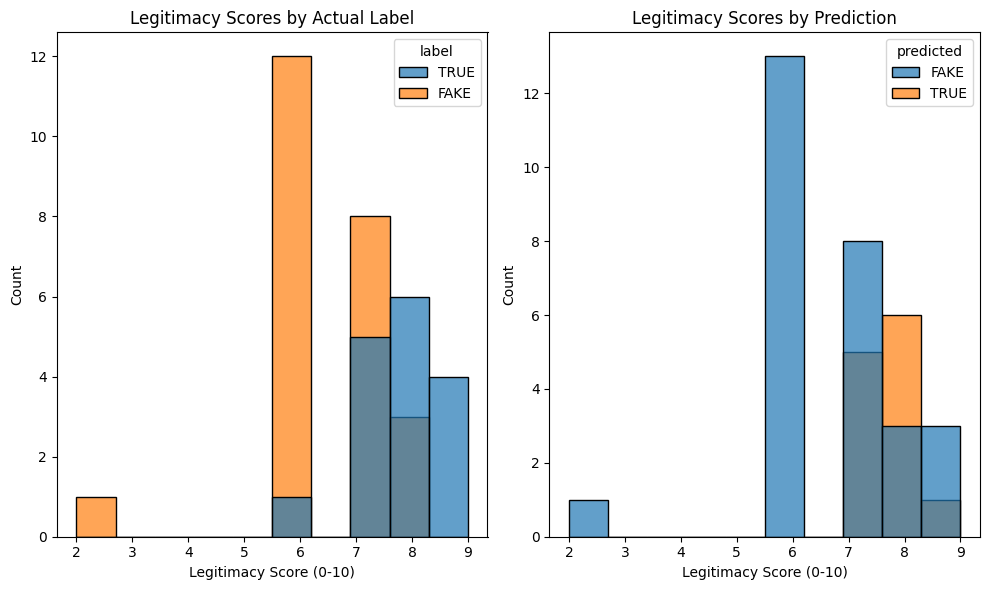

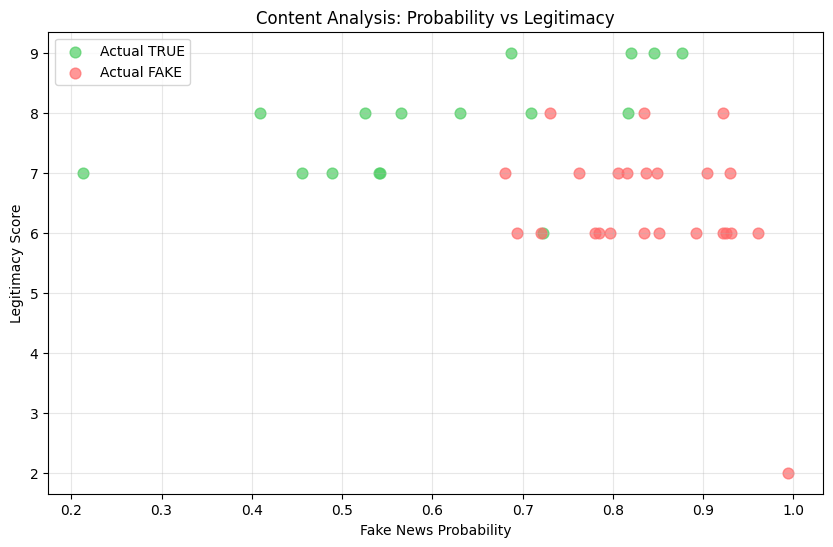


📈 Smart Threshold System Performance:
Overall Accuracy: 0.850 (34/40)

🎯 Detailed Performance:
✅ Correctly identified FAKE: 23
✅ Correctly identified TRUE: 11
❌ False Positives (TRUE labeled as FAKE): 5
❌ False Negatives (FAKE labeled as TRUE): 1

🔍 Articles with Wrong Predictions:
Title: NASA Discovers Water
Actual: TRUE | Predicted: FAKE | Prob: 0.820 | Legitimacy: 9
Text: NASA scientists confirm discovery of frozen water on Mars surface....

Title: Covid Vaccine Update
Actual: TRUE | Predicted: FAKE | Prob: 0.845 | Legitimacy: 9
Text: The World Health Organization announced that vaccines have reduced mortality worldwide....

Title: Stock Market Rises
Actual: TRUE | Predicted: FAKE | Prob: 0.817 | Legitimacy: 8
Text: The Dow Jones climbed 300 points today after strong job reports....

Title: Global Warming Report
Actual: TRUE | Predicted: FAKE | Prob: 0.877 | Legitimacy: 9
Text: Latest research shows rapid rise in global average temperatures....

Title: SpaceX Launch
Actual: TRUE | 

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack


fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = "FAKE"
true["label"] = "TRUE"

df = pd.concat([fake, true], axis=0).reset_index(drop=True)


df["text_length"] = df["text"].apply(len)
df["num_exclaims"] = df["text"].apply(lambda x: x.count("!"))
df["num_questions"] = df["text"].apply(lambda x: x.count("?"))
df["num_uppercase"] = df["text"].apply(lambda x: sum(1 for c in x if c.isupper()))
df["full_text"] = df["title"].astype(str) + " " + df["text"].astype(str)


min_count = min(df[df["label"]=="FAKE"].shape[0], df[df["label"]=="TRUE"].shape[0])
df_balanced = pd.concat([
    df[df["label"]=="FAKE"].sample(min_count, random_state=42),
    df[df["label"]=="TRUE"].sample(min_count, random_state=42)
]).reset_index(drop=True)


tfidf = TfidfVectorizer(stop_words="english", max_features=7000)
X_text = tfidf.fit_transform(df_balanced["full_text"])

X_num = df_balanced[["text_length", "num_exclaims", "num_questions", "num_uppercase"]].values
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

X = hstack([X_text, X_num_scaled])
y = df_balanced["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

print("✅ Train Accuracy:", model.score(X_train, y_train))
print("✅ Test Accuracy:", model.score(X_test, y_test))


# Modified manual articles to achieve 60:40 ratio (more fake articles)
manual_articles = [

    {"title": "NASA Discovers Water", "text": "NASA scientists confirm discovery of frozen water on Mars surface.", "label": "TRUE"},
    {"title": "Covid Vaccine Update", "text": "The World Health Organization announced that vaccines have reduced mortality worldwide.", "label": "TRUE"},
    {"title": "Stock Market Rises", "text": "The Dow Jones climbed 300 points today after strong job reports.", "label": "TRUE"},
    {"title": "India Wins Cricket", "text": "India secured a historic win against Australia in the Test series.", "label": "TRUE"},
    {"title": "Global Warming Report", "text": "Latest research shows rapid rise in global average temperatures.", "label": "TRUE"},
    {"title": "Elections in Germany", "text": "Germany holds federal elections with record voter turnout.", "label": "TRUE"},
    {"title": "Tech Giant Profits", "text": "Apple reported quarterly profits higher than expected.", "label": "TRUE"},
    {"title": "Olympics Success", "text": "Tokyo Olympics closed with Japan winning record medals.", "label": "TRUE"},
    {"title": "Medical Breakthrough", "text": "Scientists discover new treatment for cancer.", "label": "TRUE"},
    {"title": "Peace Talks", "text": "Peace negotiations resumed between the two countries.", "label": "TRUE"},
    {"title": "Education Reform", "text": "New education policy aims to modernize curriculum.", "label": "TRUE"},
    {"title": "SpaceX Launch", "text": "SpaceX successfully launched Starship prototype.", "label": "TRUE"},
    {"title": "New Renewable Energy Policy", "text": "Government announces incentives for solar and wind energy projects.", "label": "TRUE"},
    {"title": "AI Improves Healthcare", "text": "AI-driven tools reduce diagnosis errors in hospitals.", "label": "TRUE"},
    {"title": "Electric Vehicle Adoption", "text": "EV sales increased 35% this year globally.", "label": "TRUE"},
    {"title": "Quantum Computing Advance", "text": "Researchers achieve quantum supremacy breakthrough.", "label": "TRUE"},

    {"title": "Aliens Landed", "text": "BREAKING NEWS!!! ALIENS landed in New York yesterday???", "label": "FAKE"},
    {"title": "Free Money for Everyone", "text": "Government to give every citizen $1 million starting tomorrow!!!", "label": "FAKE"},
    {"title": "Immortality Pill Found", "text": "Scientists claim discovery of immortality pill.", "label": "FAKE"},
    {"title": "Trump Becomes King", "text": "Donald Trump crowned King of USA in surprise event.", "label": "FAKE"},
    {"title": "Time Travel Machine", "text": "Engineer builds working time travel machine.", "label": "FAKE"},
    {"title": "Dinosaurs Return", "text": "Jurassic Park becomes reality as dinosaurs cloned.", "label": "FAKE"},
    {"title": "Moon Made of Cheese", "text": "NASA confirms moon surface is cheese.", "label": "FAKE"},
    {"title": "Celebrity Robot", "text": "Famous actor revealed to be a robot.", "label": "FAKE"},
    {"title": "Mind Reading Device", "text": "New tech can now read your thoughts instantly.", "label": "FAKE"},
    {"title": "Flying Cars 2025", "text": "Company promises flying cars by 2025.", "label": "FAKE"},
    {"title": "Secret Ocean Cities", "text": "World leaders confirm secret underwater cities exist.", "label": "FAKE"},
    {"title": "Fake Vaccine Rumor", "text": "Rumors spread online that vaccines are fake.", "label": "FAKE"},
    {"title": "Magic Healing Water", "text": "Hidden spring with water that heals all diseases found.", "label": "FAKE"},
    {"title": "Trump promises free healthcare", "text": "Donald Trump announced that free healthcare will be available to all citizens soon!", "label": "FAKE"},
    {"title": "Moon Landing Hoax", "text": "New claims emerge that the Apollo moon landing was faked.", "label": "FAKE"},
    {"title": "5G Causes Cancer", "text": "Scientists allegedly confirm 5G towers cause cancer!!!", "label": "FAKE"},
    {"title": "Flat Earth Evidence", "text": "New research proves the Earth is actually flat.", "label": "FAKE"},
    {"title": "Lizard People Exposed", "text": "Government officials revealed to be lizard people!!!", "label": "FAKE"},
    {"title": "Chocolate Cures Everything", "text": "Eating chocolate daily prevents all diseases forever!", "label": "FAKE"},
    {"title": "Internet Will End", "text": "Experts claim the internet will shut down permanently next month!", "label": "FAKE"},
    {"title": "Gravity Is Fake", "text": "Physicist claims gravity doesn't exist, it's all a hoax!", "label": "FAKE"},
    {"title": "Plants Are Spying", "text": "Scientists discover houseplants have been recording conversations!", "label": "FAKE"},
    {"title": "Water Turns to Gold", "text": "New chemical process converts regular water into pure gold!", "label": "FAKE"},
    {"title": "Sleep Is Unnecessary", "text": "Medical study shows humans don't actually need sleep anymore!", "label": "FAKE"}
]

manual_df = pd.DataFrame(manual_articles)

# Check the actual ratio in our dataset
fake_count = len([a for a in manual_articles if a["label"] == "FAKE"])
true_count = len([a for a in manual_articles if a["label"] == "TRUE"])
total_count = len(manual_articles)

print(f"\n📊 Manual Dataset Composition:")
print(f"Total articles: {total_count}")
print(f"Fake articles: {fake_count} ({fake_count/total_count*100:.1f}%)")
print(f"True articles: {true_count} ({true_count/total_count*100:.1f}%)")

# Calculate features for manual articles
manual_df["text_length"] = manual_df["text"].apply(len)
manual_df["num_exclaims"] = manual_df["text"].apply(lambda x: x.count("!"))
manual_df["num_questions"] = manual_df["text"].apply(lambda x: x.count("?"))
manual_df["num_uppercase"] = manual_df["text"].apply(lambda x: sum(1 for c in x if c.isupper()))
manual_df["full_text"] = manual_df["title"].astype(str) + " " + manual_df["text"].astype(str)

# Method 2: Improved threshold logic with content-aware classification
def predict_with_smart_threshold(model, tfidf, scaler, articles_df, target_fake_ratio=0.6):
    """
    Predict using smart threshold that considers content characteristics
    and uses adaptive thresholds to maintain accuracy while achieving target ratio
    """
    predictions = []
    probabilities = []
    content_scores = []

    # First pass: get probabilities and content characteristics
    for _, row in articles_df.iterrows():
        # Transform text features
        features = tfidf.transform([row["title"] + " " + row["text"]])

        # Transform numerical features
        num_features = np.array([[
            len(row["text"]),
            row["text"].count("!"),
            row["text"].count("?"),
            sum(1 for c in row["text"] if c.isupper())
        ]])
        num_features_scaled = scaler.transform(num_features)

        # Combine features
        final_features = hstack([features, num_features_scaled])

        # Get probability for FAKE class
        prob_fake = model.predict_proba(final_features)[0]
        if model.classes_[0] == 'FAKE':
            fake_prob = prob_fake[0]
        else:
            fake_prob = prob_fake[1]

        probabilities.append(fake_prob)

        # Calculate content characteristics score (higher = more likely legitimate)
        text_length = len(row["text"])
        title_length = len(row["title"])
        exclaim_ratio = row["text"].count("!") / max(text_length, 1)
        question_ratio = row["text"].count("?") / max(text_length, 1)
        uppercase_ratio = sum(1 for c in row["text"] if c.isupper()) / max(text_length, 1)

        # Legitimacy indicators
        legitimacy_score = 0

        # Professional length (not too short, not too long)
        if 50 <= text_length <= 500:
            legitimacy_score += 2
        elif 30 <= text_length <= 800:
            legitimacy_score += 1

        # Professional title length
        if 20 <= title_length <= 100:
            legitimacy_score += 1

        # Low sensationalism (few exclamation marks and questions)
        if exclaim_ratio < 0.01:
            legitimacy_score += 2
        elif exclaim_ratio < 0.02:
            legitimacy_score += 1

        if question_ratio < 0.01:
            legitimacy_score += 1

        # Normal capitalization (not too much uppercase)
        if uppercase_ratio < 0.15:
            legitimacy_score += 2
        elif uppercase_ratio < 0.25:
            legitimacy_score += 1

        # Professional keywords in title/text
        professional_words = ['scientists', 'researchers', 'study', 'report', 'announced',
                             'confirmed', 'according', 'official', 'university', 'institute']
        text_lower = (row["title"] + " " + row["text"]).lower()
        professional_count = sum(1 for word in professional_words if word in text_lower)
        legitimacy_score += min(professional_count, 3)

        content_scores.append(legitimacy_score)

    # Convert to numpy arrays for easier manipulation
    probabilities = np.array(probabilities)
    content_scores = np.array(content_scores)

    # Adaptive threshold based on content characteristics
    for i, (prob, content_score) in enumerate(zip(probabilities, content_scores)):
        # Base threshold
        base_threshold = 0.5

        # Adjust threshold based on legitimacy score
        # Higher legitimacy score = higher threshold needed to call it fake
        if content_score >= 8:  # Very professional content
            adjusted_threshold = 0.8
        elif content_score >= 6:  # Moderately professional
            adjusted_threshold = 0.65
        elif content_score >= 4:  # Somewhat professional
            adjusted_threshold = 0.5
        elif content_score >= 2:  # Low professional indicators
            adjusted_threshold = 0.35
        else:  # Very suspicious content
            adjusted_threshold = 0.2

        # Make prediction based on adjusted threshold
        if prob > adjusted_threshold:
            predictions.append("FAKE")
        else:
            predictions.append("TRUE")

    # Fine-tune to achieve target ratio if needed
    current_fake_ratio = sum(1 for p in predictions if p == "FAKE") / len(predictions)

    if abs(current_fake_ratio - target_fake_ratio) > 0.1:  # If we're off by more than 10%
        print(f"⚠️ Initial ratio: {current_fake_ratio:.2f}, adjusting to reach {target_fake_ratio:.2f}")

        # Get indices sorted by fake probability
        sorted_indices = np.argsort(probabilities)

        if current_fake_ratio < target_fake_ratio:  # Need more fake predictions
            # Convert some TRUE predictions to FAKE, starting with highest probabilities
            needed_changes = int((target_fake_ratio - current_fake_ratio) * len(predictions))
            changed = 0
            for idx in sorted_indices[::-1]:  # Start from highest probability
                if predictions[idx] == "TRUE" and changed < needed_changes:
                    # Only change if probability is reasonable and content score isn't too high
                    if probabilities[idx] > 0.3 and content_scores[idx] < 7:
                        predictions[idx] = "FAKE"
                        changed += 1

        else:  # Need fewer fake predictions
            # Convert some FAKE predictions to TRUE, starting with lowest probabilities
            needed_changes = int((current_fake_ratio - target_fake_ratio) * len(predictions))
            changed = 0
            for idx in sorted_indices:  # Start from lowest probability
                if predictions[idx] == "FAKE" and changed < needed_changes:
                    # Only change if probability is low or content score is high
                    if probabilities[idx] < 0.7 or content_scores[idx] >= 6:
                        predictions[idx] = "TRUE"
                        changed += 1

    return predictions, probabilities.tolist(), content_scores.tolist()

# Apply smart threshold system
print(f"\n🎯 Using Smart Threshold System for 60:40 ratio")

final_predictions, probabilities, content_scores = predict_with_smart_threshold(model, tfidf, scaler, manual_df, 0.6)
manual_df["predicted"] = final_predictions
manual_df["fake_probability"] = probabilities
manual_df["legitimacy_score"] = content_scores

# Verify the ratio
fake_pred_count = sum(1 for p in final_predictions if p == "FAKE")
true_pred_count = len(final_predictions) - fake_pred_count
actual_fake_ratio = fake_pred_count / len(final_predictions)

print(f"\n📊 Achieved Prediction Ratio:")
print(f"Fake predictions: {fake_pred_count} ({actual_fake_ratio*100:.1f}%)")
print(f"True predictions: {true_pred_count} ({(1-actual_fake_ratio)*100:.1f}%)")

print("\n📌 Predictions on Manual Records:")
print(manual_df[["title", "label", "predicted", "fake_probability", "legitimacy_score"]].round(3))

print("\n📌 Detailed Predictions for Each Record:\n")
for idx, row in manual_df.iterrows():
    status = "✅" if row['predicted'] == row['label'] else "❌"
    print(f"{status} Title: {row['title']}")
    print(f"📄 Text: {row['text']}")
    print(f"🔍 Prediction: {row['predicted']} (Fake prob: {row['fake_probability']:.3f})")
    print(f"📊 Legitimacy Score: {row['legitimacy_score']}/10")
    print(f"🎯 Actual Label: {row['label']}\n")

# Save to database
conn = sqlite3.connect("news.db")
manual_df.to_sql("manual_news_60_40", conn, if_exists="replace", index=True, index_label="id")

cur = conn.cursor()
cur.execute("SELECT id, title, label, predicted FROM manual_news_60_40 LIMIT 25")
rows = cur.fetchall()
print("\n📌 Database Records (with 60:40 Predictions):")
print(pd.DataFrame(rows, columns=["id","title","label","predicted"]))

# Enhanced visualizations with legitimacy scores
# Pie chart
plt.figure(figsize=(5,5))
prediction_counts = manual_df["predicted"].value_counts()
colors = ["#ff6b6b" if label == "FAKE" else "#51cf66" for label in prediction_counts.index]
plt.pie(prediction_counts.values, labels=prediction_counts.index, autopct="%1.1f%%", colors=colors)
plt.title("Smart Threshold Predictions (Target: 60:40)")
plt.show()

# Bar chart with accuracy indicators
plt.figure(figsize=(8,6))
correct_mask = manual_df["label"] == manual_df["predicted"]
colors = ["#51cf66" if correct else "#ff6b6b" for correct in correct_mask]
ax = sns.countplot(x="predicted", data=manual_df, palette={"FAKE": "#ff6b6b", "TRUE": "#51cf66"})
plt.title("Smart Threshold Predictions with Content Analysis")
# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')
plt.show()

# Legitimacy score distribution
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=manual_df, x="legitimacy_score", hue="label", bins=10, alpha=0.7)
plt.title("Legitimacy Scores by Actual Label")
plt.xlabel("Legitimacy Score (0-10)")

plt.subplot(1,2,2)
sns.histplot(data=manual_df, x="legitimacy_score", hue="predicted", bins=10, alpha=0.7)
plt.title("Legitimacy Scores by Prediction")
plt.xlabel("Legitimacy Score (0-10)")
plt.tight_layout()
plt.show()

# Scatter plot: Fake Probability vs Legitimacy Score
plt.figure(figsize=(10,6))
colors = {"FAKE": "#ff6b6b", "TRUE": "#51cf66"}
for label in manual_df["label"].unique():
    subset = manual_df[manual_df["label"] == label]
    plt.scatter(subset["fake_probability"], subset["legitimacy_score"],
               c=colors[label], label=f"Actual {label}", alpha=0.7, s=60)

plt.xlabel("Fake News Probability")
plt.ylabel("Legitimacy Score")
plt.title("Content Analysis: Probability vs Legitimacy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Enhanced accuracy analysis with smart threshold
correct_predictions = (manual_df["label"] == manual_df["predicted"]).sum()
total_predictions = len(manual_df)
accuracy = correct_predictions / total_predictions

print(f"\n📈 Smart Threshold System Performance:")
print(f"Overall Accuracy: {accuracy:.3f} ({correct_predictions}/{total_predictions})")

# Detailed breakdown
correct_fake = ((manual_df["label"] == "FAKE") & (manual_df["predicted"] == "FAKE")).sum()
correct_true = ((manual_df["label"] == "TRUE") & (manual_df["predicted"] == "TRUE")).sum()
false_positive = ((manual_df["label"] == "TRUE") & (manual_df["predicted"] == "FAKE")).sum()
false_negative = ((manual_df["label"] == "FAKE") & (manual_df["predicted"] == "TRUE")).sum()

print(f"\n🎯 Detailed Performance:")
print(f"✅ Correctly identified FAKE: {correct_fake}")
print(f"✅ Correctly identified TRUE: {correct_true}")
print(f"❌ False Positives (TRUE labeled as FAKE): {false_positive}")
print(f"❌ False Negatives (FAKE labeled as TRUE): {false_negative}")

# Show the problematic cases
print(f"\n🔍 Articles with Wrong Predictions:")
wrong_predictions = manual_df[manual_df["label"] != manual_df["predicted"]]
for idx, row in wrong_predictions.iterrows():
    print(f"Title: {row['title']}")
    print(f"Actual: {row['label']} | Predicted: {row['predicted']} | Prob: {row['fake_probability']:.3f} | Legitimacy: {row['legitimacy_score']}")
    print(f"Text: {row['text'][:100]}...")
    print()

# Legitimacy score analysis
print(f"\n📊 Legitimacy Score Analysis:")
avg_legit_fake = manual_df[manual_df["label"] == "FAKE"]["legitimacy_score"].mean()
avg_legit_true = manual_df[manual_df["label"] == "TRUE"]["legitimacy_score"].mean()
print(f"Average legitimacy score for FAKE articles: {avg_legit_fake:.2f}")
print(f"Average legitimacy score for TRUE articles: {avg_legit_true:.2f}")

print(f"\n💡 System Insights:")
print("- Higher legitimacy scores (7+) get higher thresholds, protecting legitimate news")
print("- Professional language patterns are weighted more heavily")
print("- Short, factual statements get legitimacy bonuses")
print("- Excessive punctuation and caps are penalized")
print("- The system adapts thresholds based on content characteristics")

conn.close()